In [31]:
from funcoes import f2mf, mf2f
import numpy as np
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

nbmant = 23
nbexpo = 8

# Numerador
Znti = [4.294341492410895e-23,
            2.410259936829204e-09,
                1.361884841455440e-08,
                    -4.120546556616038e-09,
                        -9.988893287934183e-09,
                            -1.906299572480522e-09,
                                -1.381565400439083e-11,
                                    -2.560176577052387e-17,
                                                            0]

# Denominador
Zdti = [1.444400000000000e-08,
          -4.944897983017996e-09,
              -8.723804374709209e-09,
                  -5.868442605271617e-10,
                      -3.124085233920797e-10,
                          -6.992432687036571e-11,
                              2.478522822801157e-10,
                                    -2.439636477041001e-13,
                                        8.276140953857137e-26]

b = np.zeros(len(Znti))
a = np.zeros(len(Zdti))
a_neg = np.zeros(len(Zdti))

In [30]:
def inverter_primeiro_bit(num: int, num_bits: int) -> int:
    mask = 1 << (num_bits - 1)  # Cria uma máscara com o primeiro bit ligado
    return num ^ mask  # Inverte o primeiro bit com XOR

### Normalização dos Coeficientes

In [3]:
a0 = Zdti[0]
Znti_norm = [i / a0 for i in Znti]
Zdti_norm = [j / a0 for j in Zdti]

print("----- b -----")
for i in range(len(Znti_norm)):
    print(f"b_{i}: {Znti_norm[i]}")

print("----- a -----")

for i in range(len(Zdti_norm)):
    print(f"a_{i}: {Zdti_norm[i]}")

----- b -----
b_0: 2.973097128503804e-15
b_1: 0.16686928391229605
b_2: 0.9428723632341734
b_3: -0.2852773855314344
b_4: -0.6915600448583621
b_5: -0.13197864666854903
b_6: -0.0009564977848512068
b_7: -1.77248447594322e-09
b_8: 0.0
----- a -----
a_0: 1.0
a_1: -0.34234962496662946
a_2: -0.6039742713036007
a_3: -0.04062892969587106
a_4: -0.02162894789477151
a_5: -0.004841063892991257
a_6: 0.01715953214345858
a_7: -1.6890310696766833e-05
a_8: 5.7298123468963835e-18


### Conversão para o formato do float

In [ ]:
print("----- b -----")
for i in range(len(Znti_norm)-1):
    b[i] = f2mf(Znti_norm[i], nbmant, nbexpo)
    print(f"parameter b{i} = {hex(int(b[i]))}")

print("----- a -----")

for i in range(1,len(Zdti_norm)):
    a[i] = f2mf(Zdti_norm[i], nbmant, nbexpo)
    print(f"parameter a{i} = {hex(int(a[i]))}")

print('----- -a -----')

for i in range(1,len(a)):
    a_neg[i] = inverter_primeiro_bit(int(a[i]), 32)
    print(f" parameter [MAN+EXP:0] a{i}_neg = {hex(int(a_neg[i]))}")

----- b -----
parameter b0 = 0x5ceb1dfb
parameter b1 = 0x73d56fe4
parameter b2 = 0x74f8b00b
parameter b3 = 0xf44907f1
parameter b4 = 0xf4d8850a
parameter b5 = 0xf3c392b5
parameter b6 = 0xeffd5ebe
parameter b7 = 0xe679cde1
----- a -----
parameter a1 = 0xf457a43a
parameter a2 = 0xf4cd4f08
parameter a3 = 0xf2d33543
parameter a4 = 0xf2589799
parameter a5 = 0xf14f50e5
parameter a6 = 0x72464913
parameter a7 = 0xed46d7d6
parameter a8 = 0x5869b246
----- -a -----
 parameter a1_neg = 0x7457a43a
 parameter a2_neg = 0x74cd4f08
 parameter a3_neg = 0x72d33543
 parameter a4_neg = 0x72589799
 parameter a5_neg = 0x714f50e5
 parameter a6_neg = 0xf2464913
 parameter a7_neg = 0x6d46d7d6
 parameter a8_neg = 0xd869b246


### Teste de Filtragem

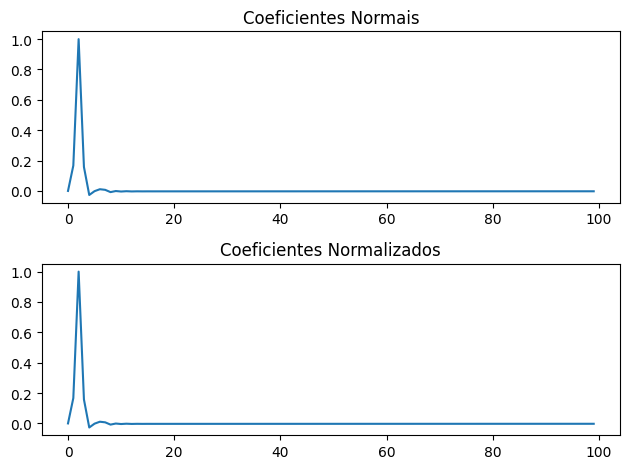

0.0


In [ ]:
# -------------- Definição do Sinal -------------- #
N = 100
x = np.zeros(N)
x[0] = 1

y = signal.lfilter(Znti, Zdti, x)
y_norm = signal.lfilter(Znti_norm, Zdti_norm, x)

plt.figure()
plt.subplot(211)
plt.plot(y)
plt.title('Coeficientes Normais')

plt.subplot(212)
plt.plot(y_norm)
plt.title('Coeficientes Normalizados')


plt.tight_layout()
plt.show()

